In [2]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import plotly.graph_objects as go 
from scipy.spatial.distance import cdist

In [3]:
centroids = pd.read_csv("brain_regions_centroids.csv")
centroids = centroids - centroids.mean(axis=0)
L_expected = np.load('L.npy')
x = centroids.values


In [4]:
def brain_adjacency_matrix(x, c: float = 1.0, p: float = 2.0):
    distances = cdist(x, x, metric='euclidean')
    A = c / (distances ** p)
    np.fill_diagonal(A, 0.0)
    return A


def symmetric_normalized_laplacian(A):
    D = np.sum(A, axis=1)
    D_inv_sqrt = np.diag(1.0 / np.sqrt(D))
    I = np.eye(A.shape[0])

    # Symmetric normalized Laplacian: L = I - D^{-1/2} A D^{-1/2}
    L = I - D_inv_sqrt @ A @ D_inv_sqrt
    return L

# Plot brain signals

In [5]:
import plotly.express as px 
from matplotlib import pyplot as plt 

In [6]:
x0 = np.load('x0_aligned.npy')
x1 = np.load('x1_liberal.npy')

In [7]:
centroids = centroids - centroids.mean(axis=0)

In [8]:
cm_data = [[0.2422, 0.1504, 0.6603],
[0.2444, 0.1534, 0.6728],
[0.2464, 0.1569, 0.6847],
[0.2484, 0.1607, 0.6961],
[0.2503, 0.1648, 0.7071],
[0.2522, 0.1689, 0.7179],
[0.254, 0.1732, 0.7286],
[0.2558, 0.1773, 0.7393],
[0.2576, 0.1814, 0.7501],
[0.2594, 0.1854, 0.761],
[0.2611, 0.1893, 0.7719],
[0.2628, 0.1932, 0.7828],
[0.2645, 0.1972, 0.7937],
[0.2661, 0.2011, 0.8043],
[0.2676, 0.2052, 0.8148],
[0.2691, 0.2094, 0.8249],
[0.2704, 0.2138, 0.8346],
[0.2717, 0.2184, 0.8439],
[0.2729, 0.2231, 0.8528],
[0.274, 0.228, 0.8612],
[0.2749, 0.233, 0.8692],
[0.2758, 0.2382, 0.8767],
[0.2766, 0.2435, 0.884],
[0.2774, 0.2489, 0.8908],
[0.2781, 0.2543, 0.8973],
[0.2788, 0.2598, 0.9035],
[0.2794, 0.2653, 0.9094],
[0.2798, 0.2708, 0.915],
[0.2802, 0.2764, 0.9204],
[0.2806, 0.2819, 0.9255],
[0.2809, 0.2875, 0.9305],
[0.2811, 0.293, 0.9352],
[0.2813, 0.2985, 0.9397],
[0.2814, 0.304, 0.9441],
[0.2814, 0.3095, 0.9483],
[0.2813, 0.315, 0.9524],
[0.2811, 0.3204, 0.9563],
[0.2809, 0.3259, 0.96],
[0.2807, 0.3313, 0.9636],
[0.2803, 0.3367, 0.967],
[0.2798, 0.3421, 0.9702],
[0.2791, 0.3475, 0.9733],
[0.2784, 0.3529, 0.9763],
[0.2776, 0.3583, 0.9791],
[0.2766, 0.3638, 0.9817],
[0.2754, 0.3693, 0.984],
[0.2741, 0.3748, 0.9862],
[0.2726, 0.3804, 0.9881],
[0.271, 0.386, 0.9898],
[0.2691, 0.3916, 0.9912],
[0.267, 0.3973, 0.9924],
[0.2647, 0.403, 0.9935],
[0.2621, 0.4088, 0.9946],
[0.2591, 0.4145, 0.9955],
[0.2556, 0.4203, 0.9965],
[0.2517, 0.4261, 0.9974],
[0.2473, 0.4319, 0.9983],
[0.2424, 0.4378, 0.9991],
[0.2369, 0.4437, 0.9996],
[0.2311, 0.4497, 0.9995],
[0.225, 0.4559, 0.9985],
[0.2189, 0.462, 0.9968],
[0.2128, 0.4682, 0.9948],
[0.2066, 0.4743, 0.9926],
[0.2006, 0.4803, 0.9906],
[0.195, 0.4861, 0.9887],
[0.1903, 0.4919, 0.9867],
[0.1869, 0.4975, 0.9844],
[0.1847, 0.503, 0.9819],
[0.1831, 0.5084, 0.9793],
[0.1818, 0.5138, 0.9766],
[0.1806, 0.5191, 0.9738],
[0.1795, 0.5244, 0.9709],
[0.1785, 0.5296, 0.9677],
[0.1778, 0.5349, 0.9641],
[0.1773, 0.5401, 0.9602],
[0.1768, 0.5452, 0.956],
[0.1764, 0.5504, 0.9516],
[0.1755, 0.5554, 0.9473],
[0.174, 0.5605, 0.9432],
[0.1716, 0.5655, 0.9393],
[0.1686, 0.5705, 0.9357],
[0.1649, 0.5755, 0.9323],
[0.161, 0.5805, 0.9289],
[0.1573, 0.5854, 0.9254],
[0.154, 0.5902, 0.9218],
[0.1513, 0.595, 0.9182],
[0.1492, 0.5997, 0.9147],
[0.1475, 0.6043, 0.9113],
[0.1461, 0.6089, 0.908],
[0.1446, 0.6135, 0.905],
[0.1429, 0.618, 0.9022],
[0.1408, 0.6226, 0.8998],
[0.1383, 0.6272, 0.8975],
[0.1354, 0.6317, 0.8953],
[0.1321, 0.6363, 0.8932],
[0.1288, 0.6408, 0.891],
[0.1253, 0.6453, 0.8887],
[0.1219, 0.6497, 0.8862],
[0.1185, 0.6541, 0.8834],
[0.1152, 0.6584, 0.8804],
[0.1119, 0.6627, 0.877],
[0.1085, 0.6669, 0.8734],
[0.1048, 0.671, 0.8695],
[0.1009, 0.675, 0.8653],
[0.0964, 0.6789, 0.8609],
[0.0914, 0.6828, 0.8562],
[0.0855, 0.6865, 0.8513],
[0.0789, 0.6902, 0.8462],
[0.0713, 0.6938, 0.8409],
[0.0628, 0.6972, 0.8355],
[0.0535, 0.7006, 0.8299],
[0.0433, 0.7039, 0.8242],
[0.0328, 0.7071, 0.8183],
[0.0234, 0.7103, 0.8124],
[0.0155, 0.7133, 0.8064],
[0.0091, 0.7163, 0.8003],
[0.0046, 0.7192, 0.7941],
[0.0019, 0.722, 0.7878],
[0.0009, 0.7248, 0.7815],
[0.0018, 0.7275, 0.7752],
[0.0046, 0.7301, 0.7688],
[0.0094, 0.7327, 0.7623],
[0.0162, 0.7352, 0.7558],
[0.0253, 0.7376, 0.7492],
[0.0369, 0.74, 0.7426],
[0.0504, 0.7423, 0.7359],
[0.0638, 0.7446, 0.7292],
[0.077, 0.7468, 0.7224],
[0.0899, 0.7489, 0.7156],
[0.1023, 0.751, 0.7088],
[0.1141, 0.7531, 0.7019],
[0.1252, 0.7552, 0.695],
[0.1354, 0.7572, 0.6881],
[0.1448, 0.7593, 0.6812],
[0.1532, 0.7614, 0.6741],
[0.1609, 0.7635, 0.6671],
[0.1678, 0.7656, 0.6599],
[0.1741, 0.7678, 0.6527],
[0.1799, 0.7699, 0.6454],
[0.1853, 0.7721, 0.6379],
[0.1905, 0.7743, 0.6303],
[0.1954, 0.7765, 0.6225],
[0.2003, 0.7787, 0.6146],
[0.2061, 0.7808, 0.6065],
[0.2118, 0.7828, 0.5983],
[0.2178, 0.7849, 0.5899],
[0.2244, 0.7869, 0.5813],
[0.2318, 0.7887, 0.5725],
[0.2401, 0.7905, 0.5636],
[0.2491, 0.7922, 0.5546],
[0.2589, 0.7937, 0.5454],
[0.2695, 0.7951, 0.536],
[0.2809, 0.7964, 0.5266],
[0.2929, 0.7975, 0.517],
[0.3052, 0.7985, 0.5074],
[0.3176, 0.7994, 0.4975],
[0.3301, 0.8002, 0.4876],
[0.3424, 0.8009, 0.4774],
[0.3548, 0.8016, 0.4669],
[0.3671, 0.8021, 0.4563],
[0.3795, 0.8026, 0.4454],
[0.3921, 0.8029, 0.4344],
[0.405, 0.8031, 0.4233],
[0.4184, 0.803, 0.4122],
[0.4322, 0.8028, 0.4013],
[0.4463, 0.8024, 0.3904],
[0.4608, 0.8018, 0.3797],
[0.4753, 0.8011, 0.3691],
[0.4899, 0.8002, 0.3586],
[0.5044, 0.7993, 0.348],
[0.5187, 0.7982, 0.3374],
[0.5329, 0.797, 0.3267],
[0.547, 0.7957, 0.3159],
[0.5609, 0.7943, 0.305],
[0.5748, 0.7929, 0.2941],
[0.5886, 0.7913, 0.2833],
[0.6024, 0.7896, 0.2726],
[0.6161, 0.7878, 0.2622],
[0.6297, 0.7859, 0.2521],
[0.6433, 0.7839, 0.2423],
[0.6567, 0.7818, 0.2329],
[0.6701, 0.7796, 0.2239],
[0.6833, 0.7773, 0.2155],
[0.6963, 0.775, 0.2075],
[0.7091, 0.7727, 0.1998],
[0.7218, 0.7703, 0.1924],
[0.7344, 0.7679, 0.1852],
[0.7468, 0.7654, 0.1782],
[0.759, 0.7629, 0.1717],
[0.771, 0.7604, 0.1658],
[0.7829, 0.7579, 0.1608],
[0.7945, 0.7554, 0.157],
[0.806, 0.7529, 0.1546],
[0.8172, 0.7505, 0.1535],
[0.8281, 0.7481, 0.1536],
[0.8389, 0.7457, 0.1546],
[0.8495, 0.7435, 0.1564],
[0.86, 0.7413, 0.1587],
[0.8703, 0.7392, 0.1615],
[0.8804, 0.7372, 0.165],
[0.8903, 0.7353, 0.1695],
[0.9, 0.7336, 0.1749],
[0.9093, 0.7321, 0.1815],
[0.9184, 0.7308, 0.189],
[0.9272, 0.7298, 0.1973],
[0.9357, 0.729, 0.2061],
[0.944, 0.7285, 0.2151],
[0.9523, 0.7284, 0.2237],
[0.9606, 0.7285, 0.2312],
[0.9689, 0.7292, 0.2373],
[0.977, 0.7304, 0.2418],
[0.9842, 0.733, 0.2446],
[0.99, 0.7365, 0.2429],
[0.9946, 0.7407, 0.2394],
[0.9966, 0.7458, 0.2351],
[0.9971, 0.7513, 0.2309],
[0.9972, 0.7569, 0.2267],
[0.9971, 0.7626, 0.2224],
[0.9969, 0.7683, 0.2181],
[0.9966, 0.774, 0.2138],
[0.9962, 0.7798, 0.2095],
[0.9957, 0.7856, 0.2053],
[0.9949, 0.7915, 0.2012],
[0.9938, 0.7974, 0.1974],
[0.9923, 0.8034, 0.1939],
[0.9906, 0.8095, 0.1906],
[0.9885, 0.8156, 0.1875],
[0.9861, 0.8218, 0.1846],
[0.9835, 0.828, 0.1817],
[0.9807, 0.8342, 0.1787],
[0.9778, 0.8404, 0.1757],
[0.9748, 0.8467, 0.1726],
[0.972, 0.8529, 0.1695],
[0.9694, 0.8591, 0.1665],
[0.9671, 0.8654, 0.1636],
[0.9651, 0.8716, 0.1608],
[0.9634, 0.8778, 0.1582],
[0.9619, 0.884, 0.1557],
[0.9608, 0.8902, 0.1532],
[0.9601, 0.8963, 0.1507],
[0.9596, 0.9023, 0.148],
[0.9595, 0.9084, 0.145],
[0.9597, 0.9143, 0.1418],
[0.9601, 0.9203, 0.1382],
[0.9608, 0.9262, 0.1344],
[0.9618, 0.932, 0.1304],
[0.9629, 0.9379, 0.1261],
[0.9642, 0.9437, 0.1216],
[0.9657, 0.9494, 0.1168],
[0.9674, 0.9552, 0.1116],
[0.9692, 0.9609, 0.1061],
[0.9711, 0.9667, 0.1001],
[0.973, 0.9724, 0.0938],
[0.9749, 0.9782, 0.0872],
[0.9769, 0.9839, 0.0805]]



from matplotlib.colors import LinearSegmentedColormap
parula = LinearSegmentedColormap.from_list('parula', cm_data)

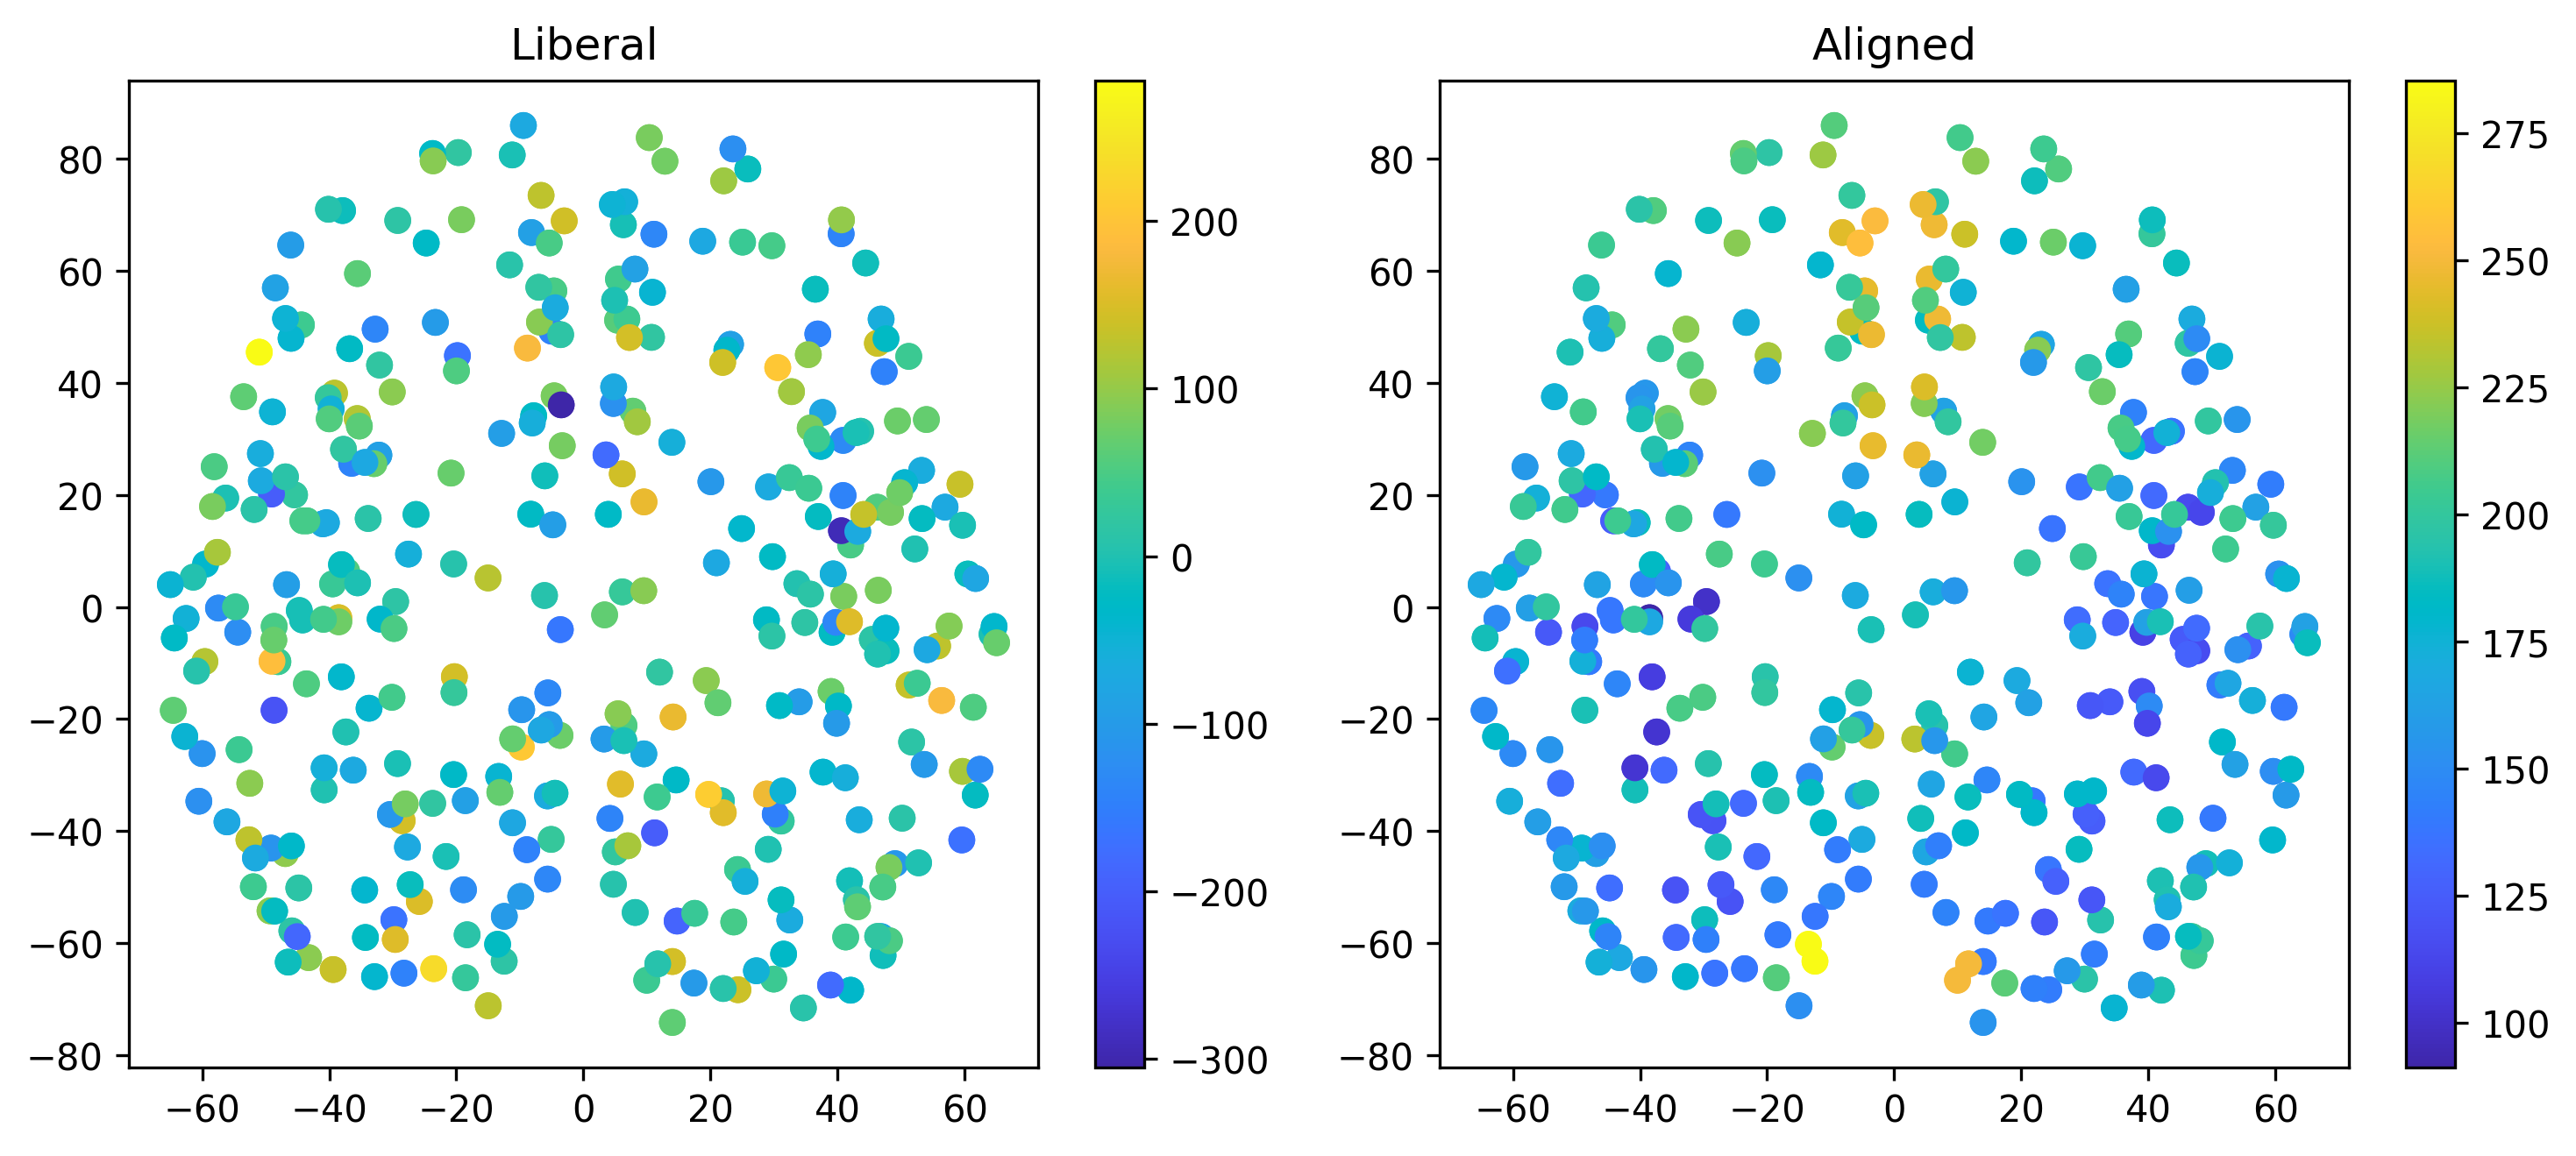

In [9]:
c1 = x1[0] * 100 
c0 = x0[0] * 100 + 200



fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4.5), dpi=300)
ax0.scatter(centroids['x'], centroids['y'], c=c1, s=40, cmap=parula)
ax1.scatter(centroids['x'], centroids['y'], c=c0, s=40, cmap=parula)

# Add colorbars to each 
cbar0 = ax0.figure.colorbar(ax0.scatter(centroids['x'], centroids['y'], c=c1, s=40, cmap=parula), ax=ax0)
cbar1 = ax1.figure.colorbar(ax1.scatter(centroids['x'], centroids['y'], c=c0, s=40, cmap=parula), ax=ax1)

# Set titles for subplots
ax0.set_title('Liberal')
ax1.set_title('Aligned')

plt.tight_layout()

In [10]:
# Calculate the pairwise distance matrix between vertices in the brain graph
from scipy.spatial.distance import cdist

# Assume centroids is a DataFrame or array with columns 'x', 'y', 'z'
positions = centroids[['x', 'y', 'z']].values
distance_matrix = cdist(positions, positions, metric='euclidean')
distance_matrix.shape  # Should be (n_vertices, n_vertices)
power_matrix = 1 / distance_matrix ** 2

# set diagonal to zero 
np.fill_diagonal(power_matrix, 0)

# 3d scatterplot of the brain 

/tmp/ipykernel_90786/2619524585.py:8: RuntimeWarning: divide by zero encountered in divide
  power_matrix = 1 / distance_matrix ** 2


In [402]:
# For each starting vertex, zero out the entries that contribute to the last 10% of the sum of the row
A = np.zeros_like(power_matrix)


eps = 0.65
for i in range(distance_matrix.shape[0]):
    row = power_matrix[i, :]

    # Get the indices of the sorted row
    threshold = eps * np.sum(row)

    # find the largest value contributing to the threshold of the sum
    sorted_row = np.sort(row)
    cumsum = np.cumsum(sorted_row)
    last_idx = np.where(cumsum > threshold)[0][0]
    largest_removed_value = sorted_row[last_idx]

    # Take the indices of the entries with values above largest_removed_value
    indices = np.where(row > largest_removed_value)[0]
    A[i, indices] = power_matrix[i, indices]

In [410]:
# For each starting vertex, zero out the entries that contribute to the last 10% of the sum of the row
A = np.zeros_like(power_matrix)


k = 20
for i in range(power_matrix.shape[0]):
    # print(np.argsort(power_matrix[i, :], order='descending').shape)
    indices = np.argsort(power_matrix[i, :])[-k:]
    A[i, indices] = power_matrix[i, indices]


In [411]:
import networkx as nx


G = nx.from_numpy_array(A)
nx.set_node_attributes(G, centroids.apply(tuple, axis=1).to_frame('pos').to_dict(orient='index'))
H = nx.subgraph(G, list(G.nodes)[:180])

In [412]:
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection


def build_edge_collection(G: nx.Graph) -> LineCollection: 
    pos = nx.get_node_attributes(G, 'pos')

    lines = []
    alphas = []
    for i, j in G.edges:
        lines.append([pos[i], pos[j]])
        alphas.append(G[i][j]['weight'])
    alphas = np.array(alphas)

    # alphas = alphas + alphas.max() * 0.05
    alphas = alphas / alphas.max()
    # alphas = (alphas - alphas.min()) / (alphas.max() - alphas.min())
    # alphas = np.clip(alphas, 0.1, 0.1)
    return Line3DCollection(lines, colors="black", linewidths=1.0, zorder=0, alpha=alphas)


def plot_vertices(G: nx.Graph, ax: plt.Axes) -> None: 
    pos = tuple(zip(*nx.get_node_attributes(G, 'pos').values()))
    ax.scatter(*pos, color="crimson", alpha=1.0, marker="o", s=5.0, zorder=1)


def plot_edges(G: nx.Graph, ax: plt.Axes) -> None: 
    ax.add_collection(build_edge_collection(G))


In [418]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

lc = build_edge_collection(H)

x, y, z = centroids['x'].values, centroids['y'].values, centroids['z'].values

# delta = 2.0
# normalize x to [0,1]
xs_all = [p[0] for seg in lc._segments3d for p in seg]
xmin, xmax = min(xs_all), max(xs_all)
x_norm = mcolors.Normalize(vmin=xmin, vmax=xmax)

# normalize y to [0,1]
ys_all = [p[1] for seg in lc._segments3d for p in seg]
ymin, ymax = min(ys_all), max(ys_all)
y_norm = mcolors.Normalize(vmin=ymin, vmax=ymax)

# normalize z to [0,1]
zs_all = [p[2] for seg in lc._segments3d for p in seg]
zmin, zmax = min(zs_all), max(zs_all)
z_norm = mcolors.Normalize(vmin=zmin, vmax=zmax)

mx, my = x.min(), y.min()
x_plus_y = np.sqrt((x - mx)**2 + (y - my)**2)
x_plus_y_norm = mcolors.Normalize(vmin=x_plus_y.min(), vmax=x_plus_y.max())



r = np.sqrt((centroids.values ** 2).sum(axis=1))
r_norm = mcolors.Normalize(vmin=r.min(), vmax=r.max())

# pick a matplotlib colormap
cmap = cm.get_cmap("viridis")   # or "plasma", "cividis", etc.

def get_color(x, y, z, alpha):
    """Map z -> colormap color with custom alpha."""
    # alpha = y_norm(y)
    # return (0, 0, 0, alpha ** 0.5)
    # n = r_norm(np.sqrt(x**2 + y**2 + z**2)) ** 2.5
    n = x_norm(x)
    # n = y_norm(y) ** 2.5
    # n = z_norm(z)
    # n = x_plus_y_norm(np.sqrt((x - mx)**2 + (y - my)**2))
    # alpha = alpha ** 0.6
    alpha = 1.0
    return cmap(n, alpha=alpha)  # returns floats in [0,1]


###### Plot
fig = go.Figure()

# line plot
all_x, all_y, all_z = [], [], []
all_colors = []
for alpha, seg in zip(lc.get_alpha(), lc._segments3d):  # or lc._segments3d
    xs, ys, zs = zip(*seg)
    all_x += list(xs) + [None]  # None breaks the line
    all_y += list(ys) + [None]
    all_z += list(zs) + [None]
    color = get_color(np.mean(xs), np.mean(ys), np.mean(zs), alpha)
    all_colors += [color, color, (0, 0, 0, 0)]

fig.add_trace(go.Scatter3d(
    x=all_x, y=all_y, z=all_z,
    mode="lines+markers",
    line=dict(color=all_colors, width=2.0),
    marker=dict(size=3.0)
))


# # marker plot
# x, y, z = centroids['x'], centroids['y'], centroids['z']
# fig.add_trace(go.Scatter3d(
#     x=x, y=y, z=z,
#     mode="markers",
#     marker=dict(size=3.0, color=z, colorscale="Viridis", opacity=1.0, showscale=True)
# ))


# increase figure size and remove axis ticks and labels
fig.update_layout(
    width=500,
    height=500,
    scene=dict(
        xaxis=dict(
            showticklabels=False,
            title='',
        ),
        yaxis=dict(
            showticklabels=False,
            title='',
        ),
        zaxis=dict(
            showticklabels=False,
            title='',
        )
    )
)

# fig.update_layout(
#     scene=dict(
#         xaxis=dict(
#             range=[-max(abs(np.min(x)), abs(np.max(x))), max(abs(np.min(x)), abs(np.max(x)))],
#             zeroline=True,
#             zerolinecolor='black',
#             showline=True,
#             linecolor='black'
#         ),
#         yaxis=dict(
#             range=[-max(abs(np.min(y)), abs(np.max(y))), max(abs(np.min(y)), abs(np.max(y)))],
#             zeroline=True,
#             zerolinecolor='black',
#             showline=True,
#             linecolor='black'
#         ),
#         zaxis=dict(
#             range=[-max(abs(np.min(z)), abs(np.max(z))), max(abs(np.min(z)), abs(np.max(z)))],
#             zeroline=True,
#             zerolinecolor='black',
#             showline=True,
#             linecolor='black'
#         ),
#     )
# )


fig.show()

/tmp/ipykernel_90786/3753595151.py:34: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [328]:
import numpy as np
import plotly.graph_objects as go

all_x, all_y, all_z = [], [], []
all_colors = []

lc = build_edge_collection(G)

# normalize z for colormap
zs_all = [p[2] for seg in lc._segments3d for p in seg]
zmin, zmax = min(zs_all), max(zs_all)

def z_to_rgb(z):
    """Map z -> RGB tuple (blue→red)."""
    t = (z - zmin) / (zmax - zmin + 1e-9)
    r = int(255 * t)
    g = int(255 * (1 - t))
    b = 150
    return r, g, b

for alpha, seg in zip(lc.get_alpha(), lc._segments3d):
    xs, ys, zs = zip(*seg)

    all_x += list(xs) + [None]
    all_y += list(ys) + [None]
    all_z += list(zs) + [None]

    avg_z = np.mean(zs)
    r, g, b = z_to_rgb(avg_z)

    color = f'rgba({r}, {g}, {b}, {alpha:.2f})'
    all_colors += [color, color, "rgba(0,0,0,0)"]

# Separate arrays for markers (no None!)
marker_x = [x for x in all_x if x is not None]
marker_y = [y for y in all_y if y is not None]
marker_z = [z for z in all_z if z is not None]

fig = go.Figure()

# Edge trace (with alpha+color)
fig.add_trace(go.Scatter3d(
    x=all_x, y=all_y, z=all_z,
    mode="lines",
    line=dict(color=all_colors, width=3.0),
    hoverinfo="none"
))

# Marker trace (depth-colored, no None issue)
fig.add_trace(go.Scatter3d(
    x=marker_x, y=marker_y, z=marker_z,
    mode="markers",
    marker=dict(
        size=4,
        color=marker_z,       # depth coloring
        colorscale="Viridis",
        opacity=0.9,
        showscale=True
    ), 
))


fig.update_layout(
    width=1000,
    height=1000,
    scene=dict(xaxis=dict(visible=False), yaxis=dict(visible=False), zaxis=dict(visible=False))
)
fig.show()

[]

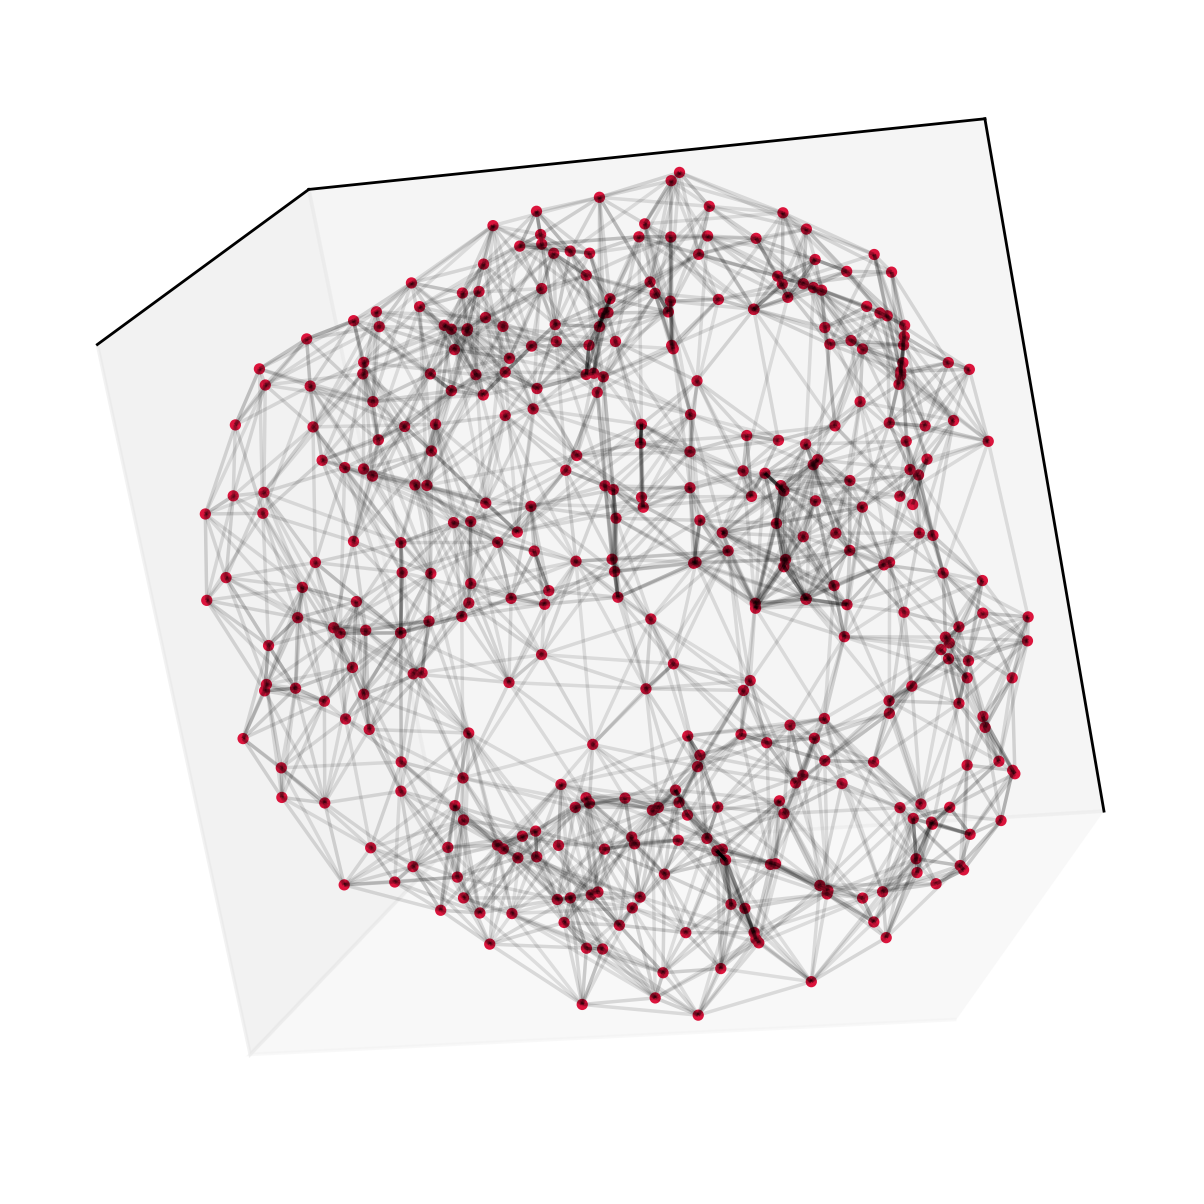

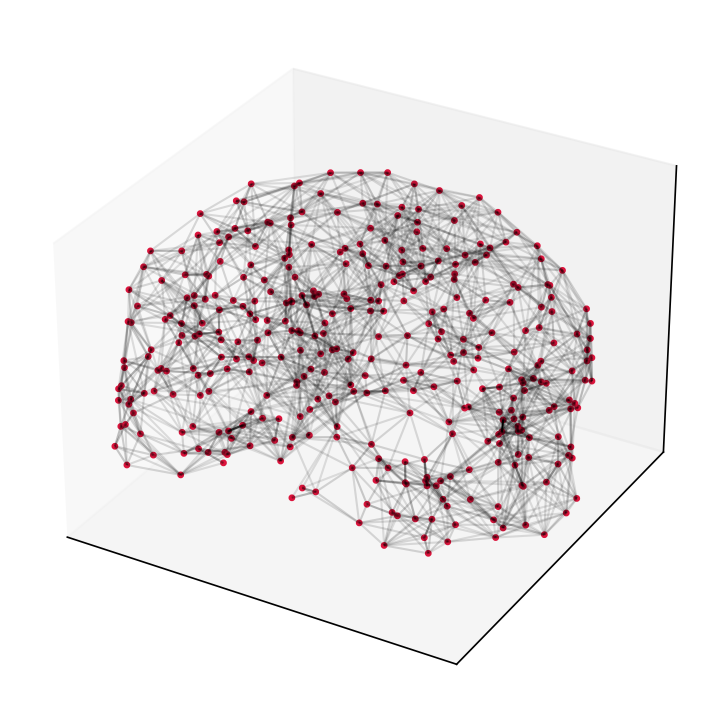

In [40]:
%matplotlib inline

fig = plt.figure(figsize=(8, 6), dpi=150)
ax = fig.add_subplot(111, projection='3d')

plot_vertices(G, ax)
plot_edges(G, ax)


# Zoom in: set tighter limits around the data
pos = np.array(tuple(zip(*nx.get_node_attributes(G, 'pos').values())))
margin = 5  # adjust as needed for zoom
for i, axis in enumerate(['x', 'y', 'z']):
    min_val = pos[i].min()
    max_val = pos[i].max()
    getattr(ax, f'set_{axis}lim')(min_val + margin, max_val - margin)


# Remove axis labels and ticks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])


# Set angle to look at it straight from the front with a slight upwards angle


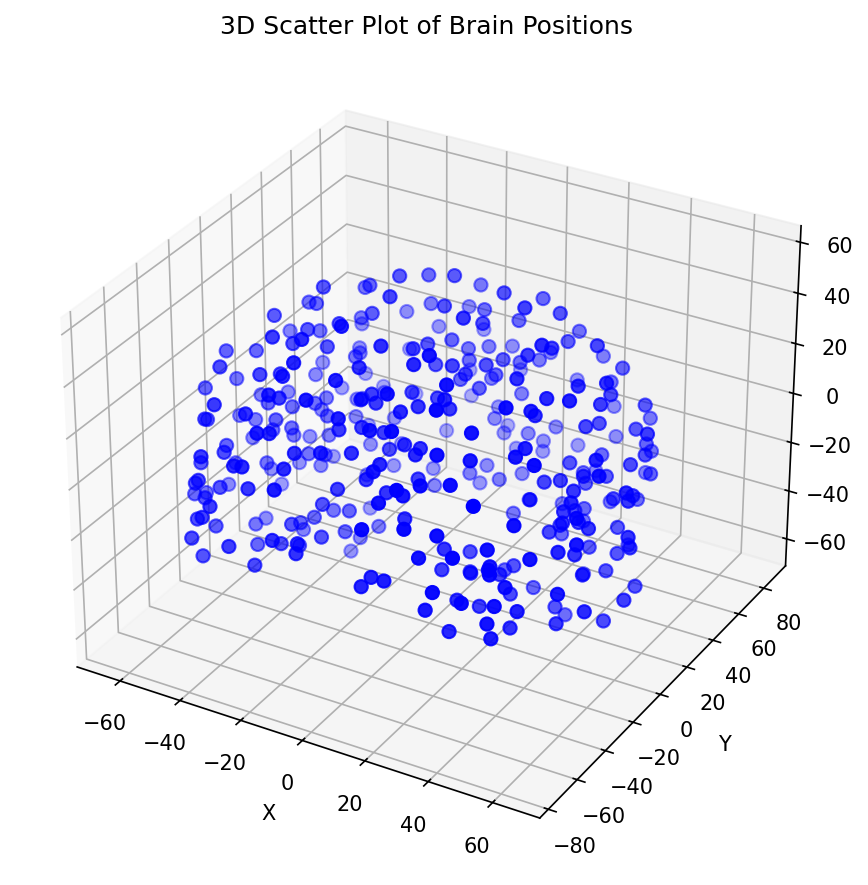

In [9]:
# 3d scatterplot of the brain 

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6), dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroids['x'], centroids['y'], centroids['z'], c='b', s=40)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Brain Positions')
plt.tight_layout()
plt.show()


In [20]:
x0.shape, x1.shape

((1190, 360), (1190, 360))

In [ ]:
x0

# Seems like calculated with the right power on the distance and with the entire coordinates

In [72]:
from itertools import permutations

In [82]:
for p, _ in zip(permutations(range(x.shape[0])), range(10)):
    continue

In [84]:
x[p, :] == x

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]], shape=(360, 3))

In [ ]:
len(list(permutations(range(x.shape[0]))))

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7b52fd3b7370>>
Traceback (most recent call last):
  File "/home/kacperwyrwal/topological-flow-matching/topological-flow-matching/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [85]:
for p in permutations(range(x.shape[0])):
    xp = x[p, :]
    A = brain_adjacency_matrix(xp)
    L = symmetric_normalized_laplacian(A)
    print(f"{np.mean(np.abs(L - L_expected)):.4f}")

/tmp/ipykernel_1732/2977714388.py:3: RuntimeWarning: divide by zero encountered in divide
  A = c / (distances ** p)


0.0003
0.0003
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0003
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0003
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004
0.0004

KeyboardInterrupt: 

In [25]:
L / L_expected

array([[1.        , 0.78152804, 0.90294678, ..., 1.05426021, 1.03954512,
        1.13644254],
       [0.78152804, 1.        , 0.95356674, ..., 0.84415778, 0.8708913 ,
        0.93228104],
       [0.90294678, 0.95356674, 1.        , ..., 0.9764992 , 0.98362166,
        1.06549664],
       ...,
       [1.05426021, 0.84415778, 0.9764992 , ..., 1.        , 1.05073135,
        1.21605652],
       [1.03954512, 0.8708913 , 0.98362166, ..., 1.05073135, 1.        ,
        0.99295706],
       [1.13644254, 0.93228104, 1.06549664, ..., 1.21605652, 0.99295706,
        1.        ]], shape=(360, 360))

In [19]:
L_expected

array([[ 1.00000000e+00, -4.85186562e-03, -7.15641300e-03, ...,
        -6.62571823e-04, -4.71117647e-04, -4.16979915e-04],
       [-4.85186562e-03,  1.00000000e+00, -4.00964723e-03, ...,
        -5.45169570e-04, -5.31084364e-04, -4.84583419e-04],
       [-7.15641300e-03, -4.00964723e-03,  1.00000000e+00, ...,
        -6.15141882e-04, -5.70798572e-04, -4.77084238e-04],
       ...,
       [-6.62571823e-04, -5.45169570e-04, -6.15141882e-04, ...,
         1.00000000e+00, -1.59434210e-03, -1.49898605e-03],
       [-4.71117647e-04, -5.31084364e-04, -5.70798572e-04, ...,
        -1.59434210e-03,  1.00000000e+00, -2.71486530e-02],
       [-4.16979915e-04, -4.84583419e-04, -4.77084238e-04, ...,
        -1.49898605e-03, -2.71486530e-02,  1.00000000e+00]],
      shape=(360, 360))

In [ ]:
import networkx as nx

# Create a NetworkX graph from the adjacency matrix
G = nx.from_numpy_array(A)

# add the coordinates to the graph
nx.set_node_attributes(G, centroids.to_dict(orient='index'))

In [28]:
A

NameError: name 'A' is not defined

In [23]:
np.load('x0_aligned.npy')

array([[ 0.49883665, -0.0909878 , -0.59966557, ...,  0.04680829,
         0.01430936,  0.11233516],
       [ 0.22986517, -0.36300689, -0.50959378, ...,  0.24000986,
         0.19802316, -0.02614435],
       [-0.31650059, -0.25410349, -1.06411781, ..., -0.47874762,
        -0.14882573, -0.14983521],
       ...,
       [-1.22307574, -0.16840713,  0.11769076, ...,  1.30113338,
        -0.22878014, -0.50662943],
       [-0.27345802,  0.15513852, -0.2179926 , ...,  0.83625187,
         0.07921271, -0.20386731],
       [ 0.26086728,  0.93082409,  0.3959319 , ...,  0.84146674,
         0.344274  ,  0.04074061]], shape=(1190, 360))